# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Split the training set into a training set and a validation set
X_val = X_train[0:10000,:,:]
X_train = X_train[10000:,:,:]
y_val = y_train[0:10000]
y_train = y_train[10000:]

# Reshape the training data tensors so that each image is a vector
X_train = X_train.reshape(50000, 784)
X_val = X_val.reshape(10000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Scale the training data so that pixel intensity lies in [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(y_train, n_classes)
Y_val = tf.keras.utils.to_categorical(y_val, n_classes)
Y_test = tf.keras.utils.to_categorical(y_test, n_classes)

11490434/11490434 [==============================] - 0s 0us/step
50000 train samples
10000 validation samples
10000 test samples


Create the MLP

In [3]:
model = Sequential()
model.add(Dense(1000, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Define some constants and train the MLP. In order to perform the model selection process, you train each model with the train dataset and evaluate it with the validation dataset. The test set remains unseen.

In [4]:
batch_size = 128
n_epoch = 60

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_val, Y_val))

Epoch 1/60
391/391 [==============================] - 10s 6ms/step - loss: 0.3101 - accuracy: 0.9076 - val_loss: 0.1505 - val_accuracy: 0.9583
Epoch 2/60
391/391 [==============================] - 2s 4ms/step - loss: 0.1441 - accuracy: 0.9575 - val_loss: 0.1103 - val_accuracy: 0.9675
Epoch 3/60
391/391 [==============================] - 2s 4ms/step - loss: 0.1076 - accuracy: 0.9683 - val_loss: 0.0902 - val_accuracy: 0.9731
Epoch 4/60
391/391 [==============================] - 2s 4ms/step - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0819 - val_accuracy: 0.9748
Epoch 5/60
391/391 [==============================] - 2s 4ms/step - loss: 0.0728 - accuracy: 0.9771 - val_loss: 0.0732 - val_accuracy: 0.9785
Epoch 6/60
391/391 [==============================] - 2s 4ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0771 - val_accuracy: 0.9773
Epoch 7/60
391/391 [==============================] - 2s 4ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0691 - val_accuracy: 0.9799
Epoch

Show the performance of the model. By observing the performance of your models on the validation set, you will choose a set of hyperparameters for your final model. The test set is still not used at this point.

Validation score: 0.08168720453977585
Validation accuracy: 0.9853000044822693


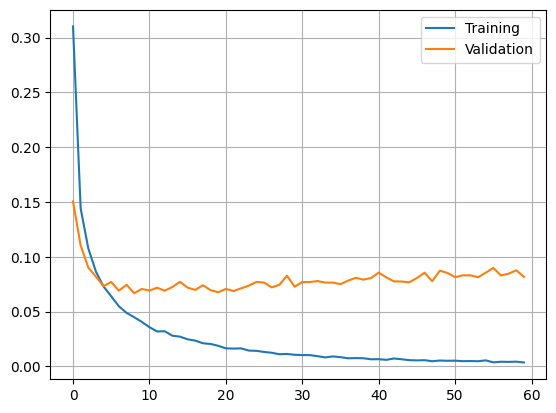

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Validation')
pl.legend()
pl.grid()

score = model.evaluate(X_val, Y_val, verbose=0)
print('Validation score:', score[0])
print('Validation accuracy:', score[1])

Now that you have chosen your final model, you can finally evaluate its performance using the test set. It is important that the test set remains hidden for your model until this last step in order to have an unbiased estimate of the performance. Therefore, you should not run the following cell until you have chosen your final model.

In [6]:
final_score = model.evaluate(X_test, Y_test, verbose=0)
print('FINAL RESULTS:')
print('Test score:', final_score[0])
print('Test accuracy:', final_score[1])

FINAL RESULTS:
Test score: 0.08360246568918228
Test accuracy: 0.9843999743461609


Confusion matrix

In [7]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

313/313 [==============================] - 1s 2ms/step


array([[ 975,    1,    1,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1127,    3,    1,    0,    0,    1,    1,    2,    0],
       [   2,    1, 1017,    3,    1,    0,    0,    5,    3,    0],
       [   1,    0,    3,  995,    0,    4,    0,    2,    3,    2],
       [   0,    0,    3,    1,  962,    0,    3,    2,    1,   10],
       [   2,    0,    0,    9,    1,  874,    1,    1,    3,    1],
       [   6,    2,    0,    1,    2,    7,  940,    0,    0,    0],
       [   1,    1,    6,    1,    0,    0,    0, 1013,    2,    4],
       [   3,    1,    2,    5,    2,    1,    1,    3,  953,    3],
       [   2,    3,    0,    5,    7,    0,    0,    3,    1,  988]])